In [43]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [72]:
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#File to Load (Change/paths)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

#Read CSV's
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")

In [71]:
#Display Clinical_data
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [46]:
#Display Mouse_data
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [47]:
#Merge both csv's into a single Data Frame
Merged_data = pd.merge(clinical_data, mouse_data, how = "left", on = ["Mouse ID", "Mouse ID"])

#Preview the Merged Data Frame
Merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [48]:
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_volume = Merged_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

#Convert to DataFrame
Tumor_volume = pd.DataFrame(Tumor_volume)

#Format Column Headers
Tumor_volume = Tumor_volume.reset_index()

#Preview DataFrame
Tumor_volume.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [49]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Tumor_SE_vol = Merged_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

#Convert to DataFrame
Tumor_SE_vol = pd.DataFrame(Tumor_SE_vol)

#Preview DataFrame and Format Table
Tumor_SE_vol.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [50]:
#Minor Data Munging to Re-Format the Data Frames
Tumor_volume = Tumor_volume.reset_index()
adjusted_Tumor_volume = Tumor_volume.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

Tumor_SE_vol = Tumor_SE_vol.reset_index()
adjusted_Tumor_SE_vol = Tumor_SE_vol.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
                                                                      
#Preview that Reformatting worked
adjusted_Tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [51]:
#Display Column Headers
print(adjusted_Tumor_volume.columns.tolist())

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [52]:
#Remove leading and trailing spaces
adjusted_Tumor_volume.columns = adjusted_Tumor_volume.columns.str.strip()
adjusted_Tumor_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [53]:
#Display Column Headers
print(adjusted_Tumor_volume.columns.tolist())

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [54]:
#Preview Data
adjusted_Tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


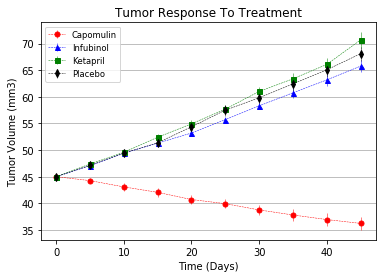

In [62]:
#Generate the Plot (with Error Bars)
plt.errorbar(adjusted_Tumor_volume.index, adjusted_Tumor_volume['Capomulin'], yerr=adjusted_Tumor_SE_vol['Capomulin'], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Tumor_volume.index, adjusted_Tumor_volume['Infubinol'], yerr=adjusted_Tumor_SE_vol['Infubinol'], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Tumor_volume.index, adjusted_Tumor_volume['Ketapril'], yerr=adjusted_Tumor_SE_vol['Ketapril'], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Tumor_volume.index, adjusted_Tumor_volume['Placebo'], yerr=adjusted_Tumor_SE_vol['Placebo'], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response To Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

#Display Graph
plt.show()

## Metastatic Response to Treatment

In [56]:
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_site_mean = Merged_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

#Convert to DataFrame
Met_site_mean = pd.DataFrame(Met_site_mean)

#Preview DataFrame
Met_site_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [57]:
#Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metSite_SE_mean = Merged_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

#Convert to DataFrame
metSite_SE_mean = pd.DataFrame(metSite_SE_mean)

#Preview DataFrame
metSite_SE_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [58]:
#Minor Data Munging to Re-Format the Data Frames
Met_site_mean = Met_site_mean.reset_index()
adjusted_Met_site_mean = Met_site_mean.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]

metSite_SE_mean = metSite_SE_mean.reset_index()
adjusted_metSite_SE_mean = metSite_SE_mean.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]

#Preview that Reformatting worked
adjusted_Met_site_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [59]:
#Rehash ---Extra Checkpoint---
adjusted_metSite_SE_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


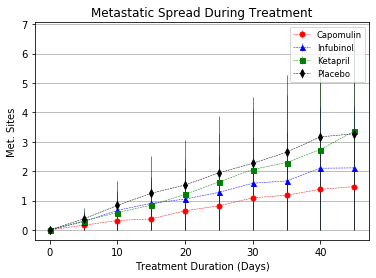

In [60]:
#Generate the Plot (with Error Bars)
plt.errorbar(adjusted_Met_site_mean.index, adjusted_Met_site_mean["Capomulin"], yerr=adjusted_metSite_SE_mean["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Met_site_mean.index, adjusted_Met_site_mean["Infubinol"], yerr=adjusted_metSite_SE_mean["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Met_site_mean.index, adjusted_Met_site_mean["Ketapril"], yerr=adjusted_metSite_SE_mean["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(adjusted_Met_site_mean.index, adjusted_Met_site_mean["Placebo"], yerr=adjusted_metSite_SE_mean["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

#Display Graph
plt.show()

## Survival Rates

In [15]:
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Survival_count = Merged_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

#Convert to DataFrame
Survival_count = pd.DataFrame({"Mouse Count": Survival_count})

#Preview DataFrame
Survival_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
#Minor Data Munging to Re-Format the Data Frames
Survival_count = Survival_count.reset_index()
adjusted_Survival_count = Survival_count.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]

#Preview the Data Frame
adjusted_Survival_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


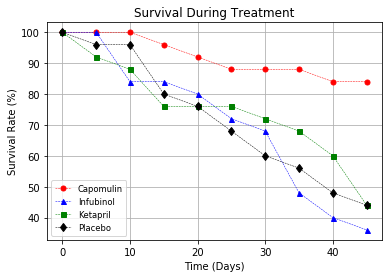

In [17]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * adjusted_Survival_count["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * adjusted_Survival_count["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * adjusted_Survival_count["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * adjusted_Survival_count["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

#Display Graph
plt.show()

## Summary Bar Graph

In [18]:
#Calculate the percent changes for each drug
Tumor_percent_change = ((adjusted_Tumor_volume.iloc[-1] - adjusted_Tumor_volume.iloc[0])/adjusted_Tumor_volume.iloc[0]) * 100

#Display the data to confirm
Tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [19]:
#Display Drug Names ---Checkpoint---
Tumor_percent_change.index
drug = list(Tumor_percent_change.index)
drug

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [20]:
#Display Tumore_percent_change values ---Checkpoint---
Tumor_percent_change = list(Tumor_percent_change.values)
Tumor_percent_change

[-19.475302667894173,
 42.516491855897414,
 46.12347172785184,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320634,
 -22.320900462766673,
 52.08513428789896,
 46.57975086509525]

In [21]:
#Calculate the percent changes for each drug
Tumor_percent_change = ((adjusted_Tumor_volume.iloc[-1] - adjusted_Tumor_volume.iloc[0])/adjusted_Tumor_volume.iloc[0]) * 100

#Display the data to confirm
Tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

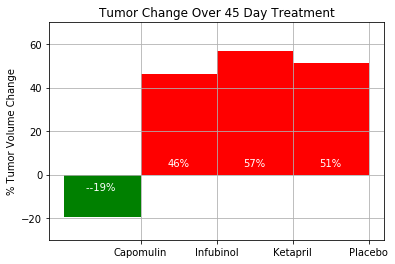

In [63]:
#Store all Relevant Percent Changes into a Tuple
Percent_changes = (Tumor_percent_change ["Capomulin"], 
               Tumor_percent_change ["Infubinol"], 
               Tumor_percent_change ["Ketapril"], 
               Tumor_percent_change ["Placebo"])

#Slice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(Percent_changes))  
width = 1
rectsPass = ax.bar(ind[0], Percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], Percent_changes[1:], width, color='red')

#Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

#Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

#Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

#Show the Figure
fig.show()

                                           _____________________


               ****************             Conclusive Analysis            ****************

                                           _____________________






1) Capomulin, shows more effective results than other treatment options tested at the Pharmaceutical Search Facility.

2) Ketapril, with a '57.028795 %' change in Tumor Volume, proved to be the least effective medication tested at our   
   facility; for the reason that it showed an increase by approximately 57% in Tumor Volume.

3) Capomulin, held down an impressive 19% reduction Tumar percent change over a given period of time.